In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import limpieza
import Outliers
import analisis_bi_multi
import var_selection

(CVXPY) May 28 09:13:01 PM: Encountered unexpected exception importing solver CVXOPT:
ImportError('DLL load failed while importing base: No se puede encontrar el módulo especificado.')
(CVXPY) May 28 09:13:01 PM: Encountered unexpected exception importing solver GLPK:
ImportError('DLL load failed while importing base: No se puede encontrar el módulo especificado.')
(CVXPY) May 28 09:13:01 PM: Encountered unexpected exception importing solver GLPK_MI:
ImportError('DLL load failed while importing base: No se puede encontrar el módulo especificado.')


In [2]:
df= pd.read_csv('D:\Documentos\projects\cars_default_2.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67651 entries, 0 to 67650
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       67651 non-null  int64  
 1   TOTAL_TERM               67622 non-null  float64
 2   APR                      67651 non-null  float64
 3   SALES_TAX                67626 non-null  float64
 4   CASH_DOWN                67648 non-null  float64
 5   DEFERRED_DOWN            67450 non-null  float64
 6   PAYMENT                  67651 non-null  float64
 7   TOTAL_GROSS_INCOME       67450 non-null  float64
 8   PTI                      67413 non-null  float64
 9   DTI                      67446 non-null  float64
 10  LTV                      67450 non-null  float64
 11  AMOUNT_FINANCED          67651 non-null  float64
 12  PURCHASE_RATE            67450 non-null  float64
 13  CONTRACT_DISCOUNT_RATE   67450 non-null  float64
 14  PAYBACK_RATE          

In [4]:
limpieza.nan(df)

ID                             0
TOTAL_TERM                    29
APR                            0
SALES_TAX                     25
CASH_DOWN                      3
DEFERRED_DOWN                201
PAYMENT                        0
TOTAL_GROSS_INCOME           201
PTI                          238
DTI                          205
LTV                          201
AMOUNT_FINANCED                0
PURCHASE_RATE                201
CONTRACT_DISCOUNT_RATE       201
PAYBACK_RATE                1003
TOTAL_EXPECTED_PAYMENTS     1003
STATE                          5
EMPLOYMENT_TYPE              792
EMPLOYMENT_TOTAL_MONTHS      605
FICO                       10176
RENT_MORTGAGE                 63
RESIDENCE_TYPE                12
TOTAL_DEBT                     8
AGE                            0
MODEL_YEAR                     8
WHOLESALE_VALUE                3
PRIMARY_GROSS_INCOME         603
SECONDARY_GROSS_INCOME     10006
COLL_RATE                   3311
DEFAULT                        0
dtype: int

In [5]:
limpieza.shapiro(df)

D:\Anaconda\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


{'ID': (0.955568790435791, 0.0),
 'TOTAL_TERM': (nan, 1.0),
 'APR': (0.9028913378715515, 0.0),
 'SALES_TAX': (nan, 1.0),
 'CASH_DOWN': (nan, 1.0),
 'DEFERRED_DOWN': (nan, 1.0),
 'PAYMENT': (0.8501993417739868, 0.0),
 'TOTAL_GROSS_INCOME': (nan, 1.0),
 'PTI': (nan, 1.0),
 'DTI': (nan, 1.0),
 'LTV': (nan, 1.0),
 'AMOUNT_FINANCED': (0.869448184967041, 0.0),
 'PURCHASE_RATE': (nan, 1.0),
 'CONTRACT_DISCOUNT_RATE': (nan, 1.0),
 'PAYBACK_RATE': (nan, 1.0),
 'TOTAL_EXPECTED_PAYMENTS': (nan, 1.0),
 'EMPLOYMENT_TOTAL_MONTHS': (nan, 1.0),
 'FICO': (nan, 1.0),
 'RENT_MORTGAGE': (nan, 1.0),
 'TOTAL_DEBT': (nan, 1.0),
 'AGE': (0.9582943916320801, 0.0),
 'MODEL_YEAR': (nan, 1.0),
 'WHOLESALE_VALUE': (nan, 1.0),
 'PRIMARY_GROSS_INCOME': (nan, 1.0),
 'SECONDARY_GROSS_INCOME': (nan, 1.0),
 'COLL_RATE': (nan, 1.0),
 'DEFAULT': (0.5673688650131226, 0.0)}

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'TOTAL_TERM'}>,
        <AxesSubplot:title={'center':'APR'}>,
        <AxesSubplot:title={'center':'SALES_TAX'}>,
        <AxesSubplot:title={'center':'CASH_DOWN'}>],
       [<AxesSubplot:title={'center':'DEFERRED_DOWN'}>,
        <AxesSubplot:title={'center':'PAYMENT'}>,
        <AxesSubplot:title={'center':'TOTAL_GROSS_INCOME'}>,
        <AxesSubplot:title={'center':'PTI'}>,
        <AxesSubplot:title={'center':'DTI'}>],
       [<AxesSubplot:title={'center':'LTV'}>,
        <AxesSubplot:title={'center':'AMOUNT_FINANCED'}>,
        <AxesSubplot:title={'center':'PURCHASE_RATE'}>,
        <AxesSubplot:title={'center':'CONTRACT_DISCOUNT_RATE'}>,
        <AxesSubplot:title={'center':'PAYBACK_RATE'}>],
       [<AxesSubplot:title={'center':'TOTAL_EXPECTED_PAYMENTS'}>,
        <AxesSubplot:title={'center':'EMPLOYMENT_TOTAL_MONTHS'}>,
        <AxesSubplot:title={'center':'FICO'}>,
        <AxesSubplot:title={'ce

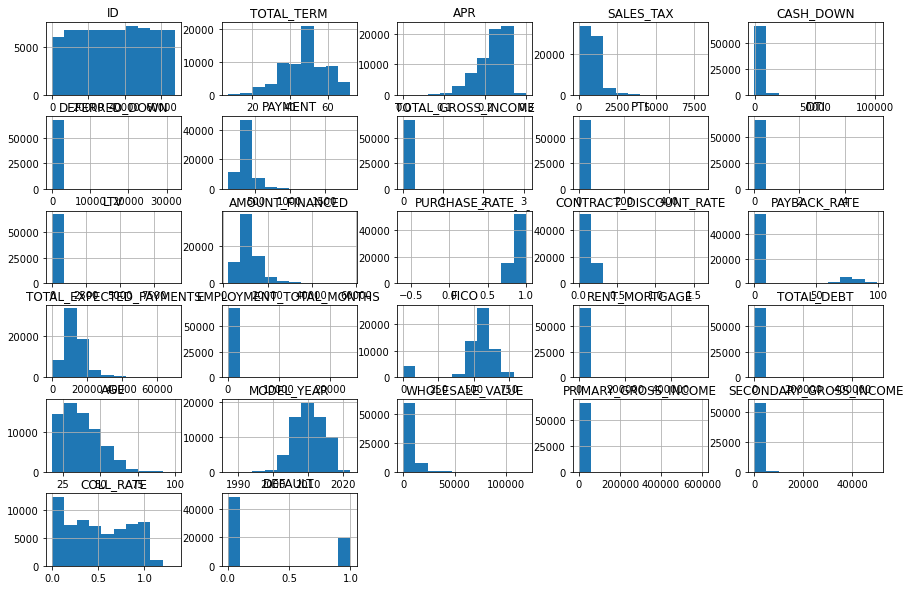

In [6]:
df.hist(figsize=(15,10))

In [7]:
dfimput= limpieza.knnimputer(df,'soft')

[SoftImpute] Max Singular Value of X_init = 11253878.214489
[SoftImpute] Iter 1: observed MAE=182.239761 rank=9
[SoftImpute] Iter 2: observed MAE=181.742363 rank=9
[SoftImpute] Iter 3: observed MAE=181.760768 rank=9
[SoftImpute] Iter 4: observed MAE=181.792148 rank=9
[SoftImpute] Iter 5: observed MAE=181.813997 rank=9
[SoftImpute] Iter 6: observed MAE=181.829305 rank=9
[SoftImpute] Iter 7: observed MAE=181.840597 rank=9
[SoftImpute] Iter 8: observed MAE=181.849208 rank=9
[SoftImpute] Iter 9: observed MAE=181.855827 rank=9
[SoftImpute] Iter 10: observed MAE=181.861003 rank=9
[SoftImpute] Iter 11: observed MAE=181.865033 rank=9
[SoftImpute] Iter 12: observed MAE=181.868175 rank=9
[SoftImpute] Iter 13: observed MAE=181.870598 rank=9
[SoftImpute] Iter 14: observed MAE=181.872487 rank=9
[SoftImpute] Iter 15: observed MAE=181.873909 rank=9
[SoftImpute] Iter 16: observed MAE=181.874953 rank=9
[SoftImpute] Iter 17: observed MAE=181.875739 rank=9
[SoftImpute] Iter 18: observed MAE=181.876322 ra

In [8]:
dfimput

,ID,TOTAL_TERM,APR,SALES_TAX,CASH_DOWN,DEFERRED_DOWN,PAYMENT,TOTAL_GROSS_INCOME,PTI,DTI,...,AGE,MODEL_YEAR,WHOLESALE_VALUE,PRIMARY_GROSS_INCOME,SECONDARY_GROSS_INCOME,COLL_RATE,DEFAULT,STATE,EMPLOYMENT_TYPE,RESIDENCE_TYPE
0,38862.0,48.0,0.1299,642.09,2000.0,0.0,209.94,15000.00,0.013996,0.0277,...,100.0,2012.0,4150.0,15000.0,0.0,0.823200,0.0,CA,EMPLOYED,CUROWN
1,29495.0,39.0,0.2299,842.54,1500.0,1500.0,329.79,3550.00,0.092899,0.1211,...,99.0,2013.0,6400.0,3550.0,0.0,0.025641,0.0,CA,EMPLOYED,CURRENT
2,62540.0,72.0,0.1799,413.22,0.0,0.0,996.21,22500.00,0.044276,0.1481,...,99.0,2018.0,0.0,10000.0,0.0,0.041772,0.0,CO,EMPLOYED,CUROWN
3,55948.0,36.0,0.1699,702.21,2000.0,0.0,222.49,3000.00,0.074163,0.2647,...,96.0,2008.0,0.0,3000.0,3000.0,0.194444,0.0,CA,RETIRED,CUROTHER
4,17086.0,24.0,0.1799,405.00,800.0,0.0,235.74,1800.00,0.130967,0.2778,...,95.0,2007.0,1400.0,1800.0,0.0,0.041667,0.0,CA,RETIRED,OWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67646,67093.0,48.0,0.2489,1378.97,3500.0,0.0,611.39,4000.00,0.152847,0.1778,...,18.0,2012.0,11008.0,4000.0,0.0,0.581656,0.0,IN,EMPLOYED,CURFAMILY
67647,67136.0,50.0,0.2259,723.09,1100.0,0.0,327.43,2000.00,0.163715,0.2137,...,18.0,2014.0,0.0,2000.0,0.0,0.482292,0.0,IN,EMPLOYED,CURRENT
67648,67191.0,30.0,0.2100,573.59,2000.0,0.0,276.78,1825.00,0.151660,0.2065,...,18.0,2012.0,0.0,2028.0,0.0,0.488517,0.0,CO,EMPLOYED,CURFAMILY
67649,67370.0,50.0,0.2495,659.70,1500.0,0.0,352.18,2800.00,0.125779,0.1615,...,18.0,2013.0,0.0,2800.0,0.0,0.469482,0.0,IN,EMPLOYED,CURFAMILY


array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'TOTAL_TERM'}>,
        <AxesSubplot:title={'center':'APR'}>,
        <AxesSubplot:title={'center':'SALES_TAX'}>,
        <AxesSubplot:title={'center':'CASH_DOWN'}>],
       [<AxesSubplot:title={'center':'DEFERRED_DOWN'}>,
        <AxesSubplot:title={'center':'PAYMENT'}>,
        <AxesSubplot:title={'center':'TOTAL_GROSS_INCOME'}>,
        <AxesSubplot:title={'center':'PTI'}>,
        <AxesSubplot:title={'center':'DTI'}>],
       [<AxesSubplot:title={'center':'LTV'}>,
        <AxesSubplot:title={'center':'AMOUNT_FINANCED'}>,
        <AxesSubplot:title={'center':'PURCHASE_RATE'}>,
        <AxesSubplot:title={'center':'CONTRACT_DISCOUNT_RATE'}>,
        <AxesSubplot:title={'center':'PAYBACK_RATE'}>],
       [<AxesSubplot:title={'center':'TOTAL_EXPECTED_PAYMENTS'}>,
        <AxesSubplot:title={'center':'EMPLOYMENT_TOTAL_MONTHS'}>,
        <AxesSubplot:title={'center':'FICO'}>,
        <AxesSubplot:title={'ce

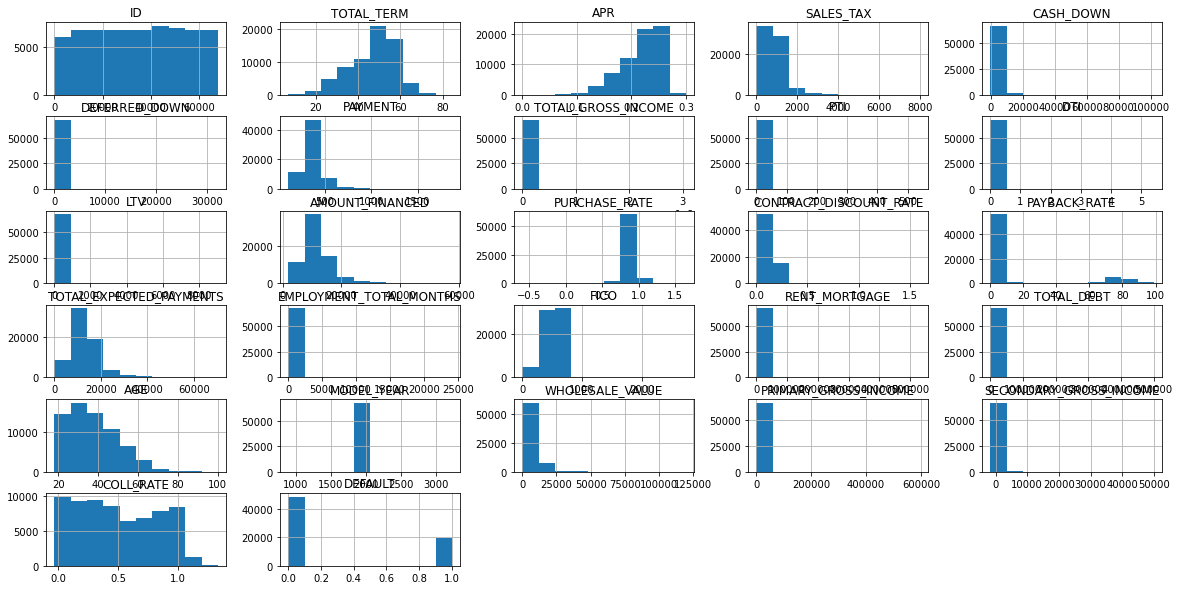

In [9]:
dfimput.hist(figsize=(20,10))

In [10]:
limpieza.shapiro(dfimput)

D:\Anaconda\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


{'ID': (0.955568790435791, 0.0),
 'TOTAL_TERM': (0.9703795909881592, 0.0),
 'APR': (0.9028913378715515, 0.0),
 'SALES_TAX': (0.8745947480201721, 0.0),
 'CASH_DOWN': (0.5841211676597595, 0.0),
 'DEFERRED_DOWN': (0.12773412466049194, 0.0),
 'PAYMENT': (0.8501993417739868, 0.0),
 'TOTAL_GROSS_INCOME': (0.040657758712768555, 0.0),
 'PTI': (0.0021596550941467285, 0.0),
 'DTI': (0.8859903812408447, 0.0),
 'LTV': (0.0007172226905822754, 0.0),
 'AMOUNT_FINANCED': (0.869448184967041, 0.0),
 'PURCHASE_RATE': (0.8818247318267822, 0.0),
 'CONTRACT_DISCOUNT_RATE': (0.8877854943275452, 0.0),
 'PAYBACK_RATE': (0.46300625801086426, 0.0),
 'TOTAL_EXPECTED_PAYMENTS': (0.9146410226821899, 0.0),
 'EMPLOYMENT_TOTAL_MONTHS': (0.17163801193237305, 0.0),
 'FICO': (0.7818899154663086, 0.0),
 'RENT_MORTGAGE': (0.017742693424224854, 0.0),
 'TOTAL_DEBT': (0.05946660041809082, 0.0),
 'AGE': (0.9582943916320801, 0.0),
 'MODEL_YEAR': (0.19548100233078003, 0.0),
 'WHOLESALE_VALUE': (0.8840462565422058, 0.0),
 'PRIMAR

In [11]:
limpieza.nan(dfimput)

ID                           0
TOTAL_TERM                   0
APR                          0
SALES_TAX                    0
CASH_DOWN                    0
DEFERRED_DOWN                0
PAYMENT                      0
TOTAL_GROSS_INCOME           0
PTI                          0
DTI                          0
LTV                          0
AMOUNT_FINANCED              0
PURCHASE_RATE                0
CONTRACT_DISCOUNT_RATE       0
PAYBACK_RATE                 0
TOTAL_EXPECTED_PAYMENTS      0
EMPLOYMENT_TOTAL_MONTHS      0
FICO                         0
RENT_MORTGAGE                0
TOTAL_DEBT                   0
AGE                          0
MODEL_YEAR                   0
WHOLESALE_VALUE              0
PRIMARY_GROSS_INCOME         0
SECONDARY_GROSS_INCOME       0
COLL_RATE                    0
DEFAULT                      0
STATE                        5
EMPLOYMENT_TYPE            792
RESIDENCE_TYPE              12
dtype: int64

In [17]:
df= limpieza.removenan(dfimput)

In [19]:
limpieza.nan(df)

ID                         0
TOTAL_TERM                 0
APR                        0
SALES_TAX                  0
CASH_DOWN                  0
DEFERRED_DOWN              0
PAYMENT                    0
TOTAL_GROSS_INCOME         0
PTI                        0
DTI                        0
LTV                        0
AMOUNT_FINANCED            0
PURCHASE_RATE              0
CONTRACT_DISCOUNT_RATE     0
PAYBACK_RATE               0
TOTAL_EXPECTED_PAYMENTS    0
EMPLOYMENT_TOTAL_MONTHS    0
FICO                       0
RENT_MORTGAGE              0
TOTAL_DEBT                 0
AGE                        0
MODEL_YEAR                 0
WHOLESALE_VALUE            0
PRIMARY_GROSS_INCOME       0
SECONDARY_GROSS_INCOME     0
COLL_RATE                  0
DEFAULT                    0
STATE                      0
EMPLOYMENT_TYPE            0
RESIDENCE_TYPE             0
dtype: int64